In [8]:
import sys
sys.path.insert(0,"../")
# from HNLproc_3 import MyProcessor
from coffea import hist, processor
import coffea
import pickle,glob

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
from coffea import hist, processor
import uproot


In [15]:


fileset = {
#     r'HNL,$m_N$=5': [
#         '~/eos/llp/HNL/HeavyNeutralLepton_Tree.root',
#     ],

#      'EGamma_2018A': glob.glob("/uscms/home/kkwok/lpclonglived/HNL/EGamma_2018A/HeavyNeutralLepton_Tree_*.root"),
      'EGamma_2018A': ["/uscms/home/kkwok/lpclonglived/HNL/EGamma_2018A/HeavyNeutralLepton_Tree_0.root"],
    
#     r'$m_s$=15,$c\tau$=1m': [
#         "~/eos/llp/ggH_HToSSTobbbb_MH-125_TuneCP5_13TeV-powheg-pythia8/HeavyNeutralLepton_Tree_15_1000.root"
#     ],    
    'WJetsToLNu': [
         "~/eos/llp/WJetsToLNu/HeavyNeutralLepton_Tree_0.root"        
    ],    
#       'WJetsToLNu':glob.glob("/eos/uscms/store/user/kkwok/llp/WJetsToLNu/HeavyNeutralLepton_Tree_1*.root")        
}

out = processor.run_uproot_job(
    fileset,
    treename="MuonSystem",
    processor_instance=MyProcessor(),
    executor=processor.iterative_executor,
    executor_args={
        "schema": None,
    },
#     maxchunks=1,
#     chunksize=100
)

Preprocessing:   0%|          | 0/2 [00:00<?, ?file/s]

Processing:   0%|          | 0/5 [00:00<?, ?chunk/s]

In [16]:
out

{'sumw': defaultdict_accumulator(float,
                         {'WJetsToLNu': 449451.0, 'EGamma_2018A': 79657.0}),
 'nCluster': <Hist (dataset,region,nCluster) instance at 0x7fc972faf890>,
 'ClusterSize': <Hist (dataset,region,ClusterSize) instance at 0x7fc97200f990>,
 'dphi_cluster_MET': <Hist (dataset,region,dphi_cluster_MET) instance at 0x7fc97207ae10>,
 'dphi_cluster_lep': <Hist (dataset,region,dphi) instance at 0x7fc971f49650>,
 'metXYCorr': <Hist (dataset,region,metXYCorr) instance at 0x7fc9720f3ed0>,
 'MT': <Hist (dataset,region,MT) instance at 0x7fc97024f750>,
 'nPV': <Hist (dataset,region,nPV) instance at 0x7fc97201d6d0>,
 'nPV_noweight': <Hist (dataset,region,nPV) instance at 0x7fc972019910>}

In [17]:
out['nPV'].identifiers('region')

[<StringBin (ele_1cls) instance at 0x7fc972444090>,
 <StringBin (ele_NoVeto) instance at 0x7fc97245e950>,
 <StringBin (ele_OOT) instance at 0x7fc97333b990>,
 <StringBin (ele_PreSel) instance at 0x7fc972444950>,
 <StringBin (ele_SR) instance at 0x7fc97247aed0>,
 <StringBin (ele_W_CR) instance at 0x7fc972473e50>,
 <StringBin (noselection) instance at 0x7fc973314690>]

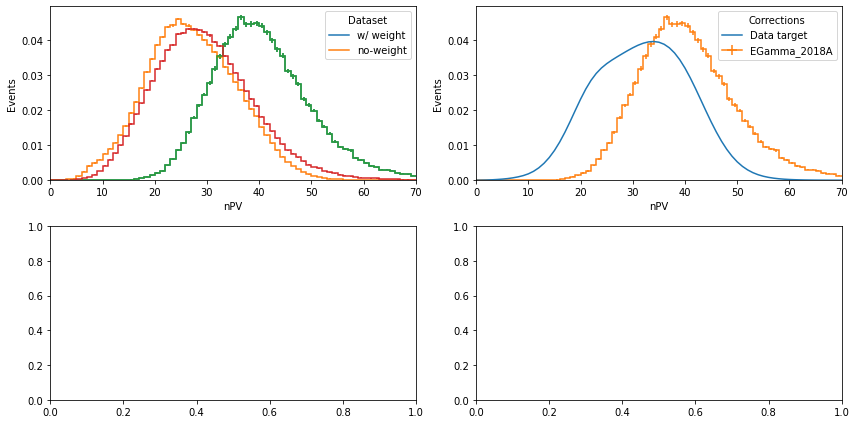

In [31]:
lumi = 0.939
br = 1
xsec = 56000*1000 *br
# nevts_WJ = out['sumw']['WJetsToLNu']
# nevts_data = out['sumw']['EGamma_2018A']

w_WJ = 1
# print('nevts_WJ = ',nevts_WJ )
# print('nevts_data = ',nevts_data )
# print('weight = ',lumi * xsec / nevts_WJ)



# regions = ['noselection','ele_W_CR','ele_PreSel','ele_OOT','ele_SR']
regions = ["noselection"]

hists=[
    "nPV",
    'nPV_noweight'
]

ncols=2
nrows=int(np.ceil((len(hists)+1)*len(regions)/ncols))
figsize=(6,3)

fig, axs = plt.subplots(nrows, ncols, squeeze=False,
                        figsize=[ncols*figsize[0],nrows*figsize[1]])
axs = axs.flatten()
i=0

for p in hists:
    for j,region in enumerate(regions):
#         print(i,len(axs),region)
#         h = out['ClusterSize'].integrate("region",region)
        if "SR" in region:
            h = out[p][1:,::].integrate("region",region)    
        else:
            h = out[p].integrate("region",region)                
        hplot = h.copy()
        hplot.scale({"WJetsToLNu": w_WJ}, "dataset")     
        hist.plot1d(hplot,ax=axs[0],overlay='dataset',density=True,clear=False,
                    legend_opts={"labels":["w/ weight","no-weight"]})
        i=i+1

        
data = out['nPV'][0:1].integrate("region","noselection")

# axs[1].plot(x,mc_pu,label="MC truth")
axs[1].plot(x,data_pu,label="Data target")
hist.plot1d(data,ax=axs[1],clear=False,density=True)
axs[1].legend(title="Corrections")
axs[0].set_xlim(0,70)
# axs[0].legend(title="WJetsToLNu",labels=["MC","Data","WJet with weight",'WJet w/o weight'])
# axs[0].set_ylim(0,0.05)
# axs[1].set_ylim(0,0.05)
axs[1].set_xlim(0,70)
plt.tight_layout()
plt.show()

In [10]:
x=np.array([
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
    60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
    80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99
])

In [12]:
import uproot3
from coffea import hist, lookup_tools
with uproot3.open("../data/pileUp_Cert_314472-325175_13TeV_PromptReco_Collisions18_JSON.root") as fin_pileup:
    norm = lambda x: x / x.sum()
    #print(fin_pileup["pileup"].values)
    #print(fin_pileup["pileup"].values.sum())
    data_pu = norm(fin_pileup["pileup"].values)

    mc_pu = np.array([
        4.695341e-10, 1.206213e-06, 1.162593e-06, 6.118058e-06, 1.626767e-05,
        3.508135e-05, 7.12608e-05, 0.0001400641, 0.0002663403, 0.0004867473,
        0.0008469, 0.001394142, 0.002169081, 0.003198514, 0.004491138,
        0.006036423, 0.007806509, 0.00976048, 0.0118498, 0.01402411,
        0.01623639, 0.01844593, 0.02061956, 0.02273221, 0.02476554,
        0.02670494, 0.02853662, 0.03024538, 0.03181323, 0.03321895,
        0.03443884, 0.035448, 0.03622242, 0.03674106, 0.0369877,
        0.03695224, 0.03663157, 0.03602986, 0.03515857, 0.03403612,
        0.0326868, 0.03113936, 0.02942582, 0.02757999, 0.02563551,
        0.02362497, 0.02158003, 0.01953143, 0.01750863, 0.01553934,
        0.01364905, 0.01186035, 0.01019246, 0.008660705, 0.007275915,
        0.006043917, 0.004965276, 0.004035611, 0.003246373, 0.002585932,
        0.002040746, 0.001596402, 0.001238498, 0.0009533139, 0.0007282885,
        0.000552306, 0.0004158005, 0.0003107302, 0.0002304612, 0.0001696012,
        0.0001238161, 8.96531e-05, 6.438087e-05, 4.585302e-05, 3.23949e-05,
        2.271048e-05, 1.580622e-05, 1.09286e-05, 7.512748e-06, 5.140304e-06,
        3.505254e-06, 2.386437e-06, 1.625859e-06, 1.111865e-06, 7.663272e-07,
        5.350694e-07, 3.808318e-07, 2.781785e-07, 2.098661e-07, 1.642811e-07,
        1.312835e-07, 1.081326e-07, 9.141993e-08, 7.890983e-08, 6.91468e-08,
        6.119019e-08, 5.443693e-08, 4.85036e-08, 4.31486e-08, 3.822112e-08
    ])
    mask = mc_pu > 0.
    corr = data_pu.copy()
    corr[mask] /= mc_pu[mask]
    pileup_corr = lookup_tools.dense_lookup.dense_lookup(corr, fin_pileup["pileup"].edges)

In [6]:
out['nPV'].identifiers('region')

[<StringBin (ele_1cls) instance at 0x7fc979055f10>,
 <StringBin (ele_NoVeto) instance at 0x7fc97906a950>,
 <StringBin (ele_OOT) instance at 0x7fc9790619d0>,
 <StringBin (ele_PreSel) instance at 0x7fc9790c9f50>,
 <StringBin (ele_SR) instance at 0x7fc979050050>,
 <StringBin (ele_W_CR) instance at 0x7fc97904e810>,
 <StringBin (noselection) instance at 0x7fc97906c5d0>]

nevts_WJ =  4940910.0
weight =  10.642573938808843


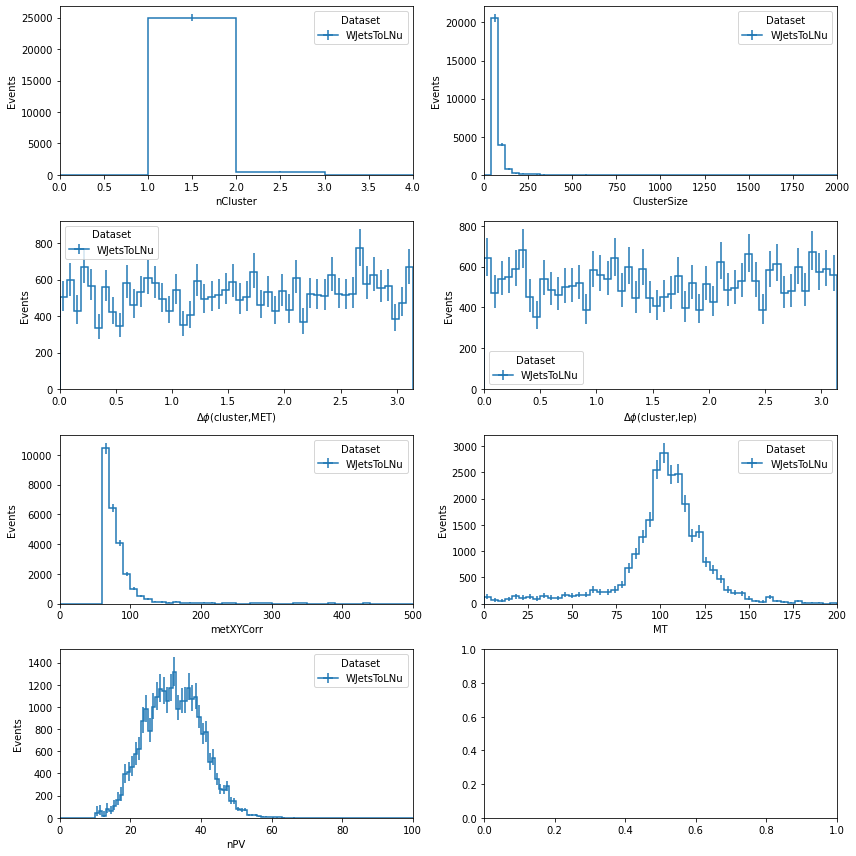

In [8]:
lumi = 0.939
br = 1
xsec = 56000*1000 *br
nevts_WJ = out['sumw']['WJetsToLNu']
w_WJ = lumi*xsec/nevts_WJ
print('nevts_WJ = ',nevts_WJ )
print('weight = ',lumi * xsec / nevts_WJ)


regions = ["ele_1cls"]

hists=[
    'nCluster',
    'ClusterSize', 
    'dphi_cluster_MET',
    'dphi_cluster_lep',
    'metXYCorr',
    'MT',
    "nPV"
]

ncols=2
nrows=int(np.ceil(len(hists)*len(regions)/ncols))
figsize=(6,3)

fig, axs = plt.subplots(nrows, ncols, squeeze=False,
                        figsize=[ncols*figsize[0],nrows*figsize[1]])
axs = axs.flatten()
i=0

for p in hists:
    for j,region in enumerate(regions):
#         print(i,len(axs),region)
#         h = out['ClusterSize'].integrate("region",region)
        if "SR" in region:
            h = out[p][1:,::].integrate("region",region)    
        else:
            h = out[p].integrate("region",region)                
        hplot = h.copy()
        hplot.scale({"WJetsToLNu": w_WJ}, "dataset")     
        hist.plot1d(hplot,ax=axs[i],overlay='dataset',density=False)
        i=i+1

plt.tight_layout()
plt.show()

In [4]:
import uproot3

In [18]:
len(events)

449451

In [22]:
ak.max(events.gWPt)

1125.7528

In [90]:
(wp_pt.values/binsize)/wp_pt.values.sum()

array([4.06787785e-02, 4.60438948e-02, 3.04055173e-02, 2.02785178e-02,
       1.44566837e-02, 1.03628090e-02, 7.79315576e-03, 5.84349802e-03,
       4.60497780e-03, 3.62935261e-03, 2.52249290e-03, 1.64113566e-03,
       1.08379198e-03, 7.16743440e-04, 5.09834129e-04, 2.85032348e-04,
       1.35086457e-04, 5.40365638e-05, 1.24679930e-05, 6.40425470e-07,
       3.26089770e-09])

In [88]:
len(binsize)

21

In [41]:
numer = h.values()[()]/h.values()[()].sum()

In [10]:
with uproot.open("../dyturbo_cms/wm-13tev-cms.root") as f:
    wm = f['s_qt']

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc2297e9e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

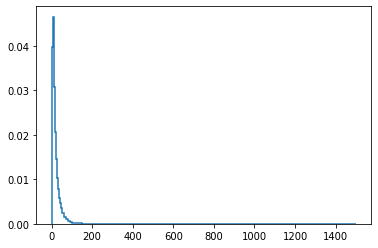

In [20]:
wm.to_hist().plot1d(density=True)

In [18]:
LO.edges

AttributeError: 'Hist' object has no attribute 'edges'

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc231bd7250>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

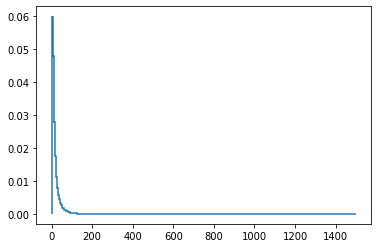

In [17]:
LO.plot1d(density=True)

In [41]:
a=wm_pt.to_hist()

In [52]:
wm_pt.errors()

array([1.92139087e+03, 1.92901471e+03, 1.37634316e+03, 5.97097429e+02,
       2.27503788e+02, 4.96160675e+02, 2.37717711e+02, 2.01631535e+02,
       1.50788349e+02, 7.60054402e+01, 2.43092425e+02, 1.01103215e+02,
       7.68188673e+01, 1.01682499e+01, 6.43308036e+00, 4.69606345e+00,
       3.57832786e+00, 5.64280123e+00, 7.52819323e+00, 1.28761550e+00,
       7.81399862e-03])

In [48]:
dir(a)

['__add__',
 '__annotations__',
 '__array__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_axis',
 '_compute_commonindex',
 '_compute_inplace_op',
 '_export_bh_',
 '_family',
 '_from_histogram_object',
 '_generate_axes_',
 '_hist',
 '_import_bh_',
 '_index_transform',
 '_loc_shortcut',
 '_name_to_index',
 '_new_hist',
 '_reduce',
 '_repr_html_',
 '_step_shortcut',
 '_storage_type',
 '_types',
 '_variance_known',
 'axes',
 'copy',
 'coun

In [30]:
from hist import Hist

AttributeError: 'Model_TH1D_v2' object has no attribute 'plot1d'

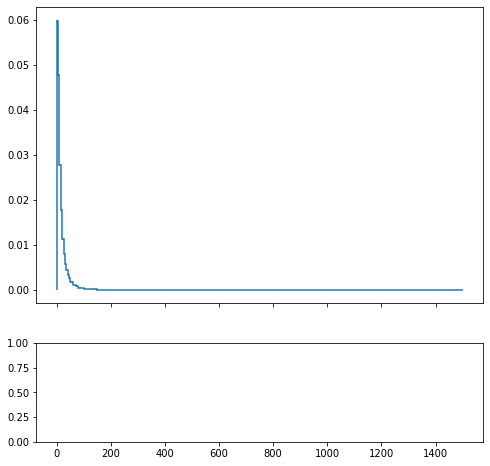

In [34]:
with uproot.open("../dyturbo_cms/wm-13tev-cms.root") as f:
    wm_pt = f['s_qt']
    
fig, axs = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [3, 1]},
                        sharex=True,squeeze=True)
axs=axs.flatten()

h = hist.Hist("Events",hist.Bin("gWPt", "gWPt", wp_pt.edges)).to_hist()

h.fill(gWPt=events.gWPt)
h.label='Events/GeV'
# hist.plot1d(h,ax=axs[0],legend_opts={"labels":["WJetsToLNu"]},density=True,clear=False)
h.plot1d(density=True, ax=axs[0])
wm_pt.plot1d(density=True,ax=axs[0])
axs[0].set_yscale('log')



In [67]:
with uproot3.open("../dyturbo_cms/wm-13tev-cms.root") as f:
    wm_pt = f['s_qt']
with uproot.open("../dyturbo_cms/wm-13tev-cms.root") as f:
    wm_pt_4 = f['s_qt']    
with uproot3.open("../dyturbo_cms/wp-13tev-cms.root") as f:
    wp_pt = f['s_qt'] 
with uproot.open("../dyturbo_cms/wp-13tev-cms.root") as f:
    wp_pt_4 = f['s_qt'] 

events_raw = uproot.open("~/eos/llp/WJetsToLNu/HeavyNeutralLepton_Tree_0.root")['MuonSystem']

df = coffea.processor.LazyDataFrame(events_raw)
start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
events = uproot.lazy(df._tree)
events = events[start:stop]    
    

In [71]:
with uproot3.open("../dyturbo_cms/wp-13tev-cms.root") as f:
    wp_pt = f['s_qt'] 
f= uproot.open("../WPT.root")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe6ba59bfd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

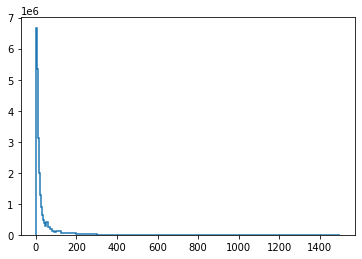

In [69]:
f['Wpt'].to_hist().plot1d()

In [84]:
wp_pt.edges

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   60.,   70.,   80.,   90.,  100.,  125.,  150.,
        200.,  300.,  800., 1500.])

In [83]:
wp_pt.values

array([2.27364870e+06, 2.57351979e+06, 1.69944791e+06, 1.13342208e+06,
       8.08023776e+05, 5.79205868e+05, 4.35580889e+05, 3.26609161e+05,
       2.57384862e+05, 2.02854490e+05, 2.81978118e+05, 1.83455163e+05,
       1.21152223e+05, 8.01215205e+04, 5.69920606e+04, 7.96562056e+04,
       3.77517663e+04, 3.02025203e+04, 1.39374077e+04, 3.57951392e+03,
       2.55164746e+01])

In [82]:
wp_pt_4.errors()

array([2.41772639e+03, 5.82653649e+02, 3.39522103e+02, 2.16606456e+02,
       1.47132633e+02, 3.97951715e+02, 2.10235517e+02, 1.08906065e+02,
       5.91046718e+01, 3.42040310e+01, 1.51467687e+02, 1.04094089e+02,
       1.20040741e+02, 7.24516430e+01, 1.88365834e+01, 4.63788087e+01,
       4.16962236e+00, 7.06410612e+00, 5.82248278e+00, 2.26830853e+00,
       1.01058396e-02])

In [80]:
1/np.sqrt(wp_pt.values)

array([0.00066319, 0.00062336, 0.00076709, 0.0009393 , 0.00111247,
       0.00131396, 0.00151518, 0.00174979, 0.0019711 , 0.00222028,
       0.00188318, 0.00233472, 0.00287299, 0.00353285, 0.00418883,
       0.00354316, 0.00514673, 0.00575411, 0.0084705 , 0.01671429,
       0.19796557])

In [73]:
wp_pt_4.errors()/binsize/wp_pt.values.sum()

array([4.32565313e-05, 1.04244946e-05, 6.07452876e-06, 3.87539466e-06,
       2.63241009e-06, 7.11991682e-06, 3.76140959e-06, 1.94848293e-06,
       1.05746585e-06, 6.11958302e-07, 1.35498515e-06, 9.31194955e-07,
       1.07384898e-06, 6.48130982e-07, 1.68506507e-07, 1.65956446e-07,
       1.49200837e-08, 1.26386811e-08, 5.20862099e-09, 4.05832352e-10,
       1.29148363e-12])

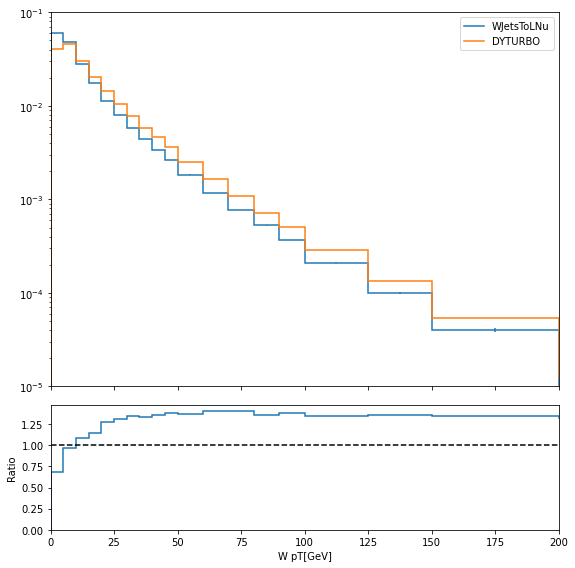

In [75]:
fig, axs = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [3, 1]},
                        sharex=True,squeeze=True)
axs=axs.flatten()



f['Wpt'].to_hist().plot1d(ax=axs[0],density=True)
WJ= axs[0].get_lines()[0].get_ydata()

binsize= wp_pt.edges[1:]-wp_pt.edges[:-1]
dyturbo = (wp_pt.values/binsize)/wp_pt.values.sum()

hep.histplot(dyturbo,wp_pt.edges,
             yerr=wp_pt_4.errors()/binsize/wp_pt.values.sum(),
             ax=axs[0])

axs[0].set_xlabel("")
axs[1].set_xlabel("W pT[GeV]")
axs[0].set_yscale('log');
axs[0].set_ylim(1e-05,0.1)
axs[0].set_xlim(0,200)

axs[0].get_lines()[0].get_ydata()
axs[0].legend(labels=["WJetsToLNu","DYTURBO"])


hep.histplot(dyturbo/WJ ,wp_pt.edges,
             #yerr=np.ones_like(WJ),
             ax=axs[1])
axs[1].set_ylabel("Ratio")
axs[1].axhline(1,ls="--",c='black')

plt.tight_layout()

fig.savefig("WpT_correction.pdf")